# <font color=red>Netflix Daily Top10

- 미국의 넷플릭스 일간 top10 영화, TV쇼에 관한 데이터(2020 ~ 2022. 3)
- Netflix Daily Top 10 Movie/TV Show in the United States from 2020 - Mar 2022


- 변수들
    - As of : 시점
    - Rank : 순위
    - Year to Date Rank : 연초대비 순위
    - Last Week Rank : 지난주 순위
    - Title : 영화 or 드라마 제목
    - Type : 장르
    - Netflix Exclusive : 넷플릭스 전용
    - Netflix Release Date : 넷플릭스에서의 공개일
    - Days In Top 10 : 탑10에 들어갔던 일 수
    - Viewership Score : 시청자 평가점수
    


- 출처 : [Kaggle - Netflix daily top 10](https://www.kaggle.com/prasertk/netflix-daily-top-10-in-us)

In [1]:
from IPython.display import Image

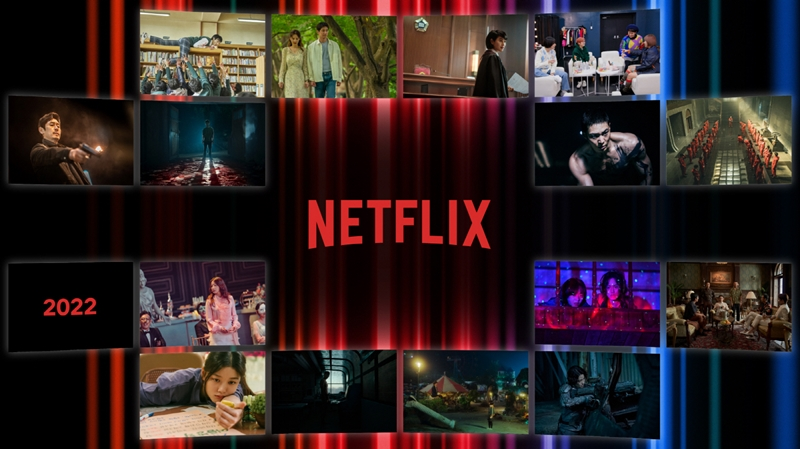

In [2]:
Image('http://www.mediatoday.co.kr/news/photo/202201/301882_405094_420.jpg')

## 1. 데이터 확인

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')

In [4]:
netflix = pd.read_csv('C:/Users/User/Downloads/netflix daily top 10.csv')

In [5]:
nf_data = netflix.copy()

In [6]:
nf_data.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [7]:
nf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [8]:
nf_data.isna().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [9]:
# Netfilx Exclusive의 결측치를 최빈값으로 채우기
fre_ne = nf_data['Netflix Exclusive'].value_counts().idxmax()
nf_data['Netflix Exclusive'] = nf_data['Netflix Exclusive'].fillna(fre_ne)

In [10]:
nf_data.isna().sum()

As of                   0
Rank                    0
Year to Date Rank       0
Last Week Rank          0
Title                   0
Type                    0
Netflix Exclusive       0
Netflix Release Date    0
Days In Top 10          0
Viewership Score        0
dtype: int64

- 결측치가 없다고 나오지만 'Last Week Rank'과 'Year to Date Rank'에서 이상한 값이 있다('-')
- 두 변수가 순위이다 보니, '-'를 0으로 바꿔버리기 보다는 '-'이 포함된 행을 삭제하는 것이 더 나을 것이라고 생각

In [11]:
# 값이 '-'인 행 제거
nf_data = nf_data[(nf_data['Last Week Rank'] != '-')&(nf_data['Year to Date Rank'] != '-')]

In [12]:
nf_data.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
2,2020-04-01,3,3,2,All American,TV Show,Yes,"Mar 28, 2019",9,76
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
10,2020-04-02,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",10,100


In [13]:
[nf_data[c].value_counts() for c in nf_data]

[2021-12-21    8
 2021-11-17    8
 2022-02-26    8
 2021-04-22    8
 2022-02-25    7
              ..
 2022-02-03    1
 2020-10-25    1
 2021-04-04    1
 2022-02-04    1
 2020-07-08    1
 Name: As of, Length: 707, dtype: int64,
 7     348
 8     339
 6     335
 9     320
 4     317
 5     312
 10    306
 2     280
 3     272
 1     188
 Name: Rank, dtype: int64,
 5     360
 4     351
 6     349
 7     340
 2     327
 3     308
 8     300
 9     257
 1     235
 10    190
 Name: Year to Date Rank, dtype: int64,
 1     652
 2     561
 3     444
 4     325
 5     269
 6     225
 7     176
 8     148
 9     120
 10     97
 Name: Last Week Rank, dtype: int64,
 Cocomelon               343
 Ozark                    68
 Manifest                 65
 The Queenâs Gambit     63
 Cobra Kai                60
                        ... 
 What Lies Below           1
 Surviving Death           1
 Death to 2020             1
 Ragnarok                  1
 Love, Guaranteed          1
 Name: Title, Lengt

- 날짜와 관련된 열은 큰 의미가 없을 것 같아 삭제
- Netflix Exclusive는 대부분이 Yes라서 삭제

In [14]:
del_cols = ['As of', 'Netflix Release Date', 'Netflix Exclusive']
nf_data = nf_data.drop(del_cols, axis=1)

In [15]:
nf_data.columns

Index(['Rank', 'Year to Date Rank', 'Last Week Rank', 'Title', 'Type',
       'Days In Top 10', 'Viewership Score'],
      dtype='object')

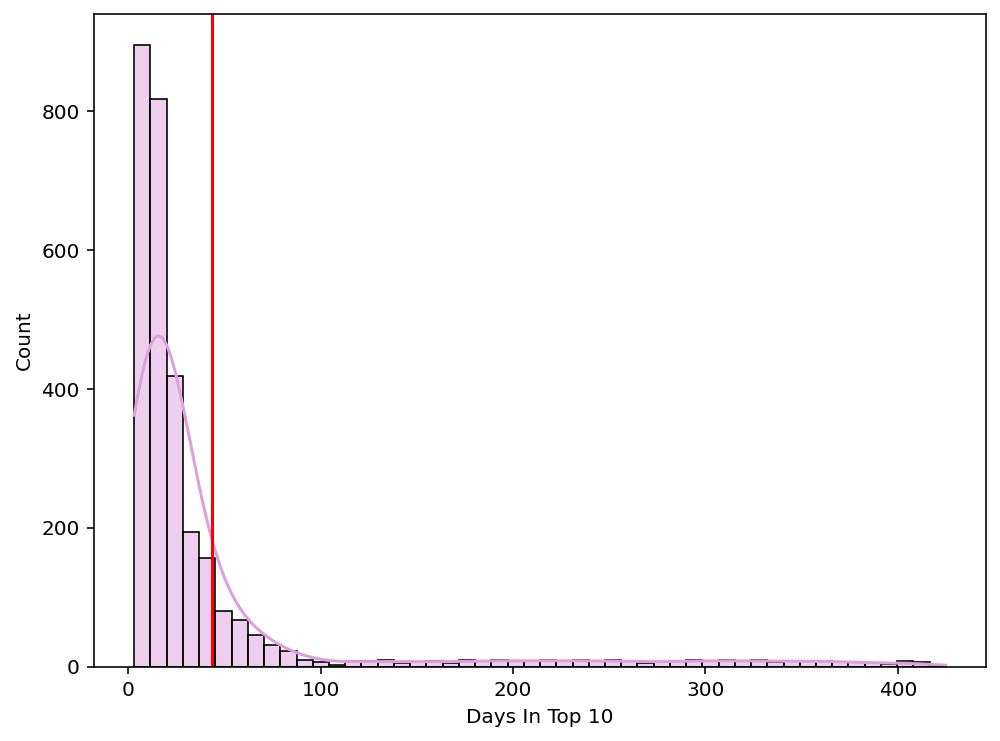

In [16]:
mean_dit = nf_data['Days In Top 10'].mean()

plt.figure(figsize=(8, 6))
sns.histplot(nf_data['Days In Top 10'], bins=50, kde=True, color='plum')
plt.axvline(mean_dit, color='r')
plt.show()

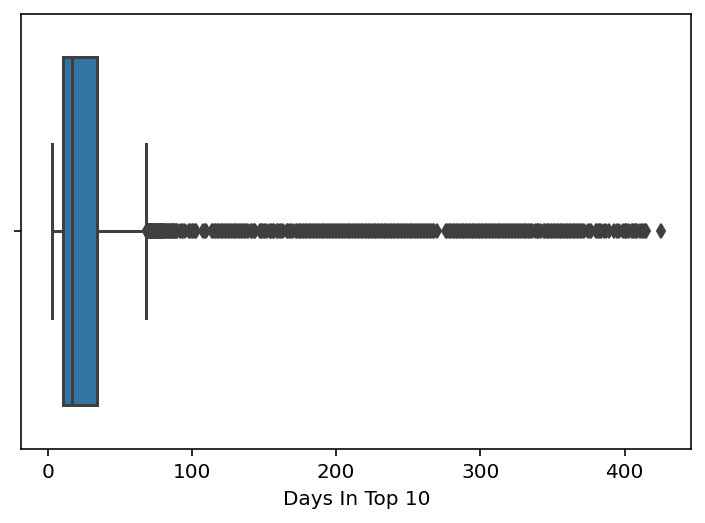

In [17]:
sns.boxplot(nf_data['Days In Top 10'])
plt.show()

- 대부분의 데이터는 0 ~ 50 사이에 있는 듯
- 이상치가 아주 많다

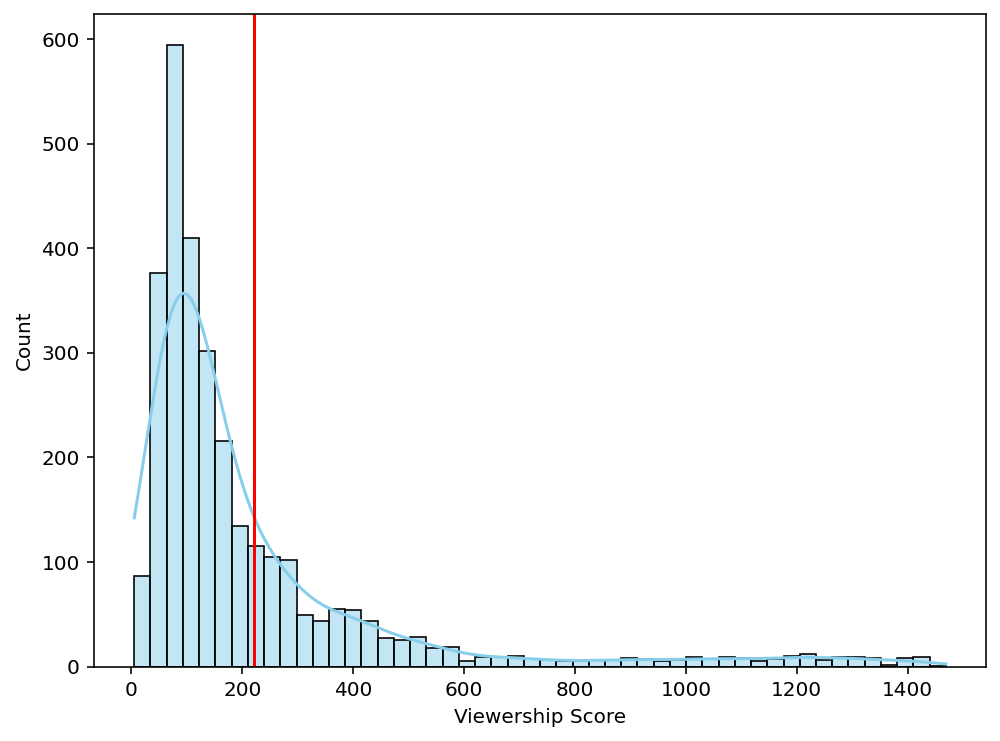

In [18]:
mean_vs = nf_data['Viewership Score'].mean()

plt.figure(figsize=(8, 6))
sns.histplot(nf_data['Viewership Score'], bins=50, kde=True, color='skyblue')
plt.axvline(mean_vs, color='r')
plt.show()

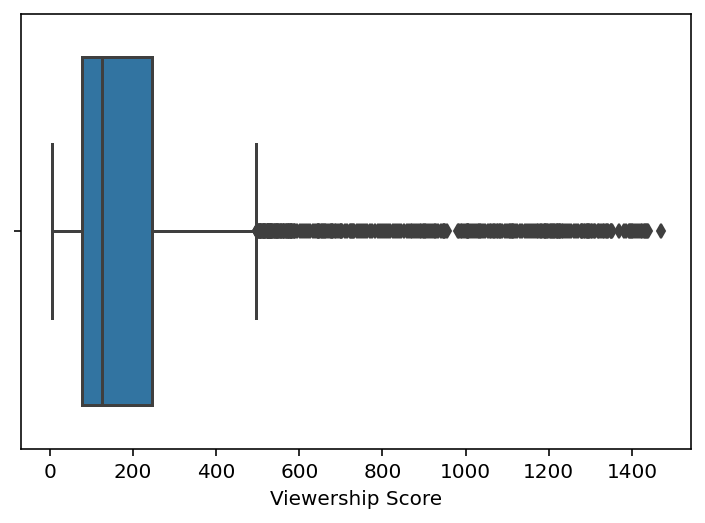

In [19]:
sns.boxplot(nf_data['Viewership Score'])
plt.show()

- 0 ~ 200 사이에 데이터가 몰려있고 Days In Top 10처럼 이상치가 아주 많다

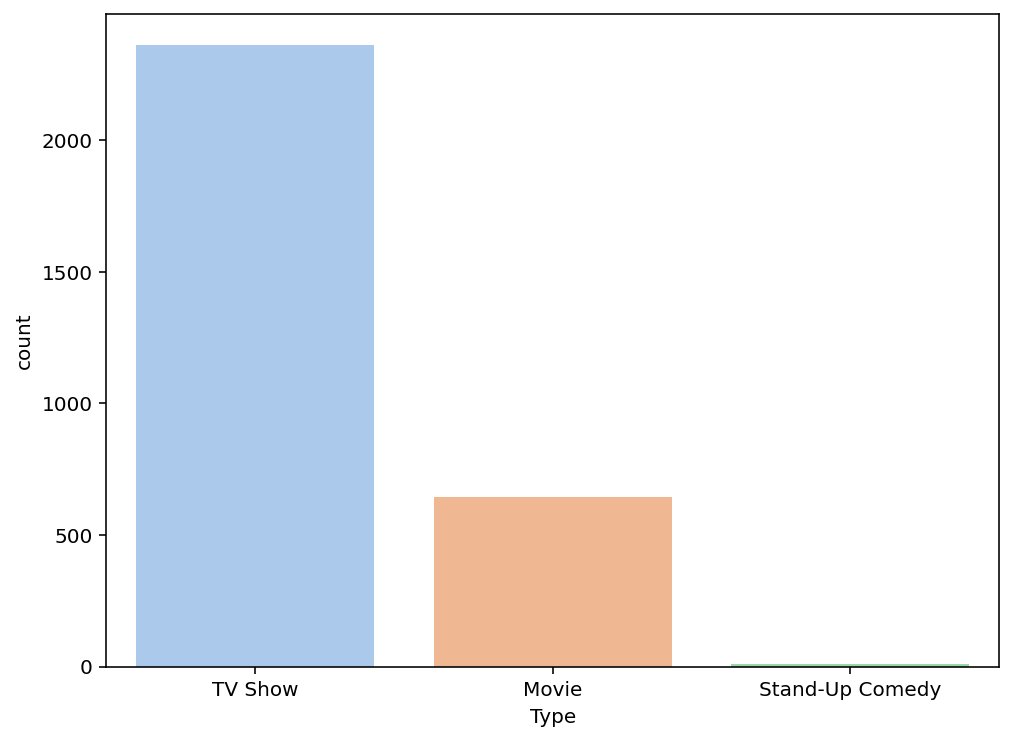

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(nf_data['Type'], palette='pastel')
plt.show()

- TV show가 대부분을 차지

## 2. 데이터 전처리

- target = 'Rank'

In [21]:
target = 'Rank'

x = nf_data.drop(target, axis=1)
y = nf_data[target]

In [22]:
cols = ['Title', 'Type']
x = pd.get_dummies(x, columns=cols)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
cols = ['Year to Date Rank', 'Last Week Rank', 'Days In Top 10', 'Viewership Score']
scale = MinMaxScaler()

x_train[cols] = scale.fit_transform(x_train[cols])
x_test[cols] = scale.transform(x_test[cols])

In [27]:
x_train.head()

,Year to Date Rank,Last Week Rank,Days In Top 10,Viewership Score,Title_#blackAF,Title_13 Reasons Why,Title_2 Hearts,Title_21 Jump Street,Title_365 Days,Title_A California Christmas,...,Title_Workinâ Moms,Title_Worldâs Most Wanted,Title_Worst Roommate Ever,Title_Yes Day,Title_You,Title_iCarly,Title_jeen-yuhs: A Kanye Trilogy,Type_Movie,Type_Stand-Up Comedy,Type_TV Show
1055,0.444444,0.111111,0.021898,0.065597,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6432,0.111111,0.000000,0.017032,0.069784,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
523,0.222222,0.222222,0.012165,0.046057,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4152,0.222222,0.000000,0.012165,0.052338,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4960,0.111111,0.000000,0.119221,0.277041,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


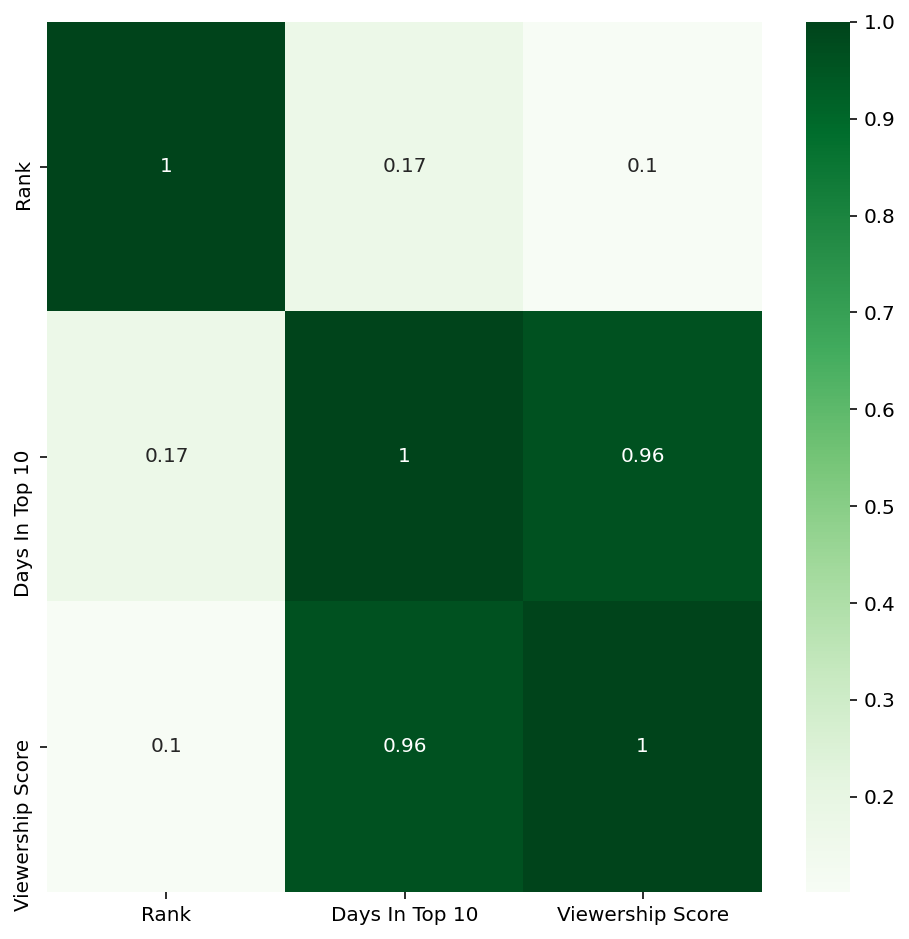

In [28]:
plt.figure(figsize=(8, 8))
sns.heatmap(nf_data.corr(), annot=True, cmap='Greens')
plt.show()

- 뒤늦게 상관관계를 찍어봤더니 rank와 상관관계가 그나마 높은 것은 일간 top10(Days In Top 10), 하지만 상관관계가 0.17로 약하다.

## 3. ML

In [29]:
x.shape, y.shape

((3017, 305), (3017,))

### 1) ARDRegression

- BayesianRidge와 함께 Bayesian regressors(베이지안 회귀 모형)에 속한다.


    - ARD를 사용하여 회귀 모형의 가중치를 fit 한다. 회귀 모형의 가중치는 가우스 분포에 있다고 가정합니다. 또한 lambda(가중치 분포의 정밀도) 및 alpha(noise 분포의 정밀도)를 추정합니다. 추정은 반복적으로 수행됩니다.
    
    - noise ≒ 오차
    
    
[ARDRegression](https://runebook.dev/ko/docs/scikit_learn/modules/generated/sklearn.linear_model.ardregression)

In [30]:
from sklearn.linear_model import ARDRegression

In [31]:
model = ARDRegression(n_iter=500, verbose=1)

In [32]:
model.fit(x_train, y_train)

Converged after 96 iterations


ARDRegression(n_iter=500, verbose=1)

In [33]:
y_pred = model.predict(x_test)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
print('RMSE : {:.4f}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('MAE : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2-Score : {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE : 1.3441
MAE : 0.9968
R2-Score : 0.7518


In [37]:
score = {}
score['ARD'] = r2_score(y_test, y_pred)

### 2) SGDRegressor

- Classical linear regressors(고전적 선형 회귀 모형)
    - 여기에 속하는 다른 모형으로는 Ridge, RidgeCV, LinearRegression이 있다.

In [38]:
from sklearn.linear_model import SGDRegressor

In [39]:
model = SGDRegressor(alpha=0.1,
                     verbose=1,
                     random_state=2022,
                     early_stopping=True)

In [40]:
model.fit(x_train, y_train)

-- Epoch 1
Norm: 3.34, NNZs: 287, Bias: 3.017820, T: 2171, Avg. loss: 2.403332
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 3.51, NNZs: 287, Bias: 3.098697, T: 4342, Avg. loss: 1.565801
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 3.65, NNZs: 287, Bias: 3.220956, T: 6513, Avg. loss: 1.466183
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 3.71, NNZs: 287, Bias: 3.306338, T: 8684, Avg. loss: 1.407654
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 3.77, NNZs: 287, Bias: 3.423927, T: 10855, Avg. loss: 1.379297
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 3.76, NNZs: 287, Bias: 3.434989, T: 13026, Avg. loss: 1.363209
Total training time: 0.05 seconds.
Convergence after 6 epochs took 0.06 seconds


SGDRegressor(alpha=0.1, early_stopping=True, random_state=2022, verbose=1)

In [41]:
y_pred = model.predict(x_test)

In [42]:
print('RMSE : {:.4f}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('MAE : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2-Score : {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE : 1.7246
MAE : 1.4253
R2-Score : 0.5914


In [43]:
score['SGD'] = r2_score(y_test, y_pred)

### <font color=violet>변수 선택이 있는 회귀 모형(Regressors with variable selection)

- ElasticNet, LassoLarcIC, OrthogonalMatchingPursuit는 변수 선택이 있는 회귀 모형(Regressors with variable selection)이다.
- 다른 모형으로는 Lars, Lasso, LassoLars 등이 있다.

[변수선택 설명 참고](https://rosypark.tistory.com/109)

### 3) ElasticNet

In [44]:
from sklearn.linear_model import ElasticNet

In [45]:
model = ElasticNet(alpha=0.1, random_state=2022)

In [46]:
model.fit(x_train, y_train)

ElasticNet(alpha=0.1, random_state=2022)

In [47]:
y_pred = model.predict(x_test)

In [48]:
print('RMSE : {:.4f}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('MAE : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2-Score : {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE : 1.5694
MAE : 1.2918
R2-Score : 0.6616


In [50]:
score['ElasticNet'] = r2_score(y_test, y_pred)

### 4) LassoLarsIC

In [51]:
from sklearn.linear_model import LassoLarsIC

In [52]:
model = LassoLarsIC()

In [53]:
model.fit(x_train, y_train)

LassoLarsIC()

In [54]:
y_pred = model.predict(x_test)

In [55]:
print('RMSE : {:.4f}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('MAE : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2-Score : {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE : 1.3186
MAE : 0.9895
R2-Score : 0.7612


In [56]:
score['LassoLarsIC'] = r2_score(y_test, y_pred)

### 5) OrthogonalMatchingPursuit

In [57]:
from sklearn.linear_model import OrthogonalMatchingPursuit

In [58]:
model = OrthogonalMatchingPursuit()

In [59]:
model.fit(x_train, y_train)

OrthogonalMatchingPursuit()

In [60]:
y_pred = model.predict(x_test)

In [61]:
print('RMSE : {:.4f}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('MAE : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2-Score : {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE : 1.3580
MAE : 1.0029
R2-Score : 0.7467


In [62]:
score['OMP'] = r2_score(y_test, y_pred)

### <font color=violet>로버스터 회귀(Outlier-robust regressors)

- [로버스터 회귀](https://en.wikipedia.org/wiki/Robust_regression)
- HuberRegressor, QuantileRegressor, RANSACRegressor, TheilSenRegressor가 있음

### 6) HuberRegressor

In [63]:
from sklearn.linear_model import HuberRegressor

In [64]:
model = HuberRegressor(alpha=0.1)

In [65]:
model.fit(x_train, y_train)

HuberRegressor(alpha=0.1)

In [66]:
y_pred = model.predict(x_test)

In [67]:
print('RMSE : {:.4f}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('MAE : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2-Score : {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE : 1.3619
MAE : 0.9881
R2-Score : 0.7452


In [68]:
score['Huber'] = r2_score(y_test, y_pred)

### <font color=violet>일반화 선형 모형(GLM)

- 기존 선형회귀 모형에서 반응 변수의 분포를 정규분포, 이항분포, 포아송분포 등으로 확장하고, 기존 반응변수 평균과 설명변수의 선형관계를 반응변수 평균의 함수와 설명변수의 선형 관계로 확장한 모형


- PoissonRegressor, TweedieRegressor, GammaRegressor가 있다.

### 7) GammaRegressor

In [69]:
from sklearn.linear_model import GammaRegressor

In [70]:
model = GammaRegressor(alpha=0.1)

In [71]:
model.fit(x_train, y_train)

GammaRegressor(alpha=0.1)

In [72]:
y_pred = model.predict(x_test)

In [73]:
print('RMSE : {:.4f}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('MAE : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2-Score : {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE : 1.7585
MAE : 1.4408
R2-Score : 0.5752


In [74]:
score['Gamma'] = r2_score(y_test, y_pred)

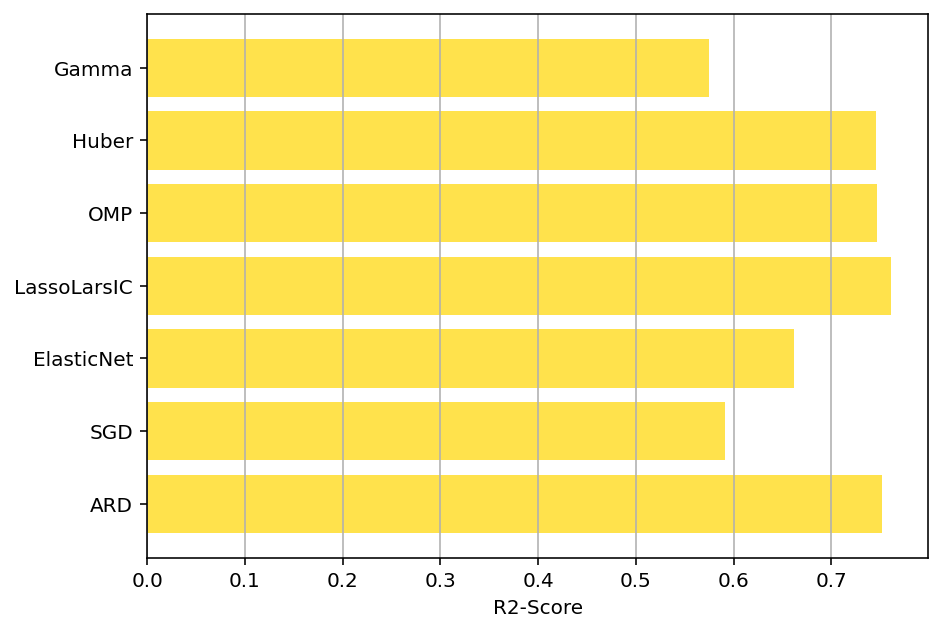

- ARD: 0.7518
- SGD: 0.5914
- ElasticNet: 0.6616
- LassoLarsIC: 0.7612
- OMP: 0.7467
- Huber: 0.7452
- Gamma: 0.5752


In [75]:
plt.figure(figsize=(7, 5))
plt.barh(list(score.keys()), score.values(), alpha=0.7, color='gold')
plt.grid(axis='x')
plt.xlabel('R2-Score')
plt.show()

for k, v in score.items() :
    print(f'- {k}: {v:.4f}')

- 최고의 모델 : LassoLarsIC